In [56]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize

# loading the csv file into pandas dataframe
df_device = pd.read_csv("train1.csv")

# our "device" column is in JASON format, so we need to convert the file into multiple columns. 
def load_df(csv_path='train1.csv', nrows=None):
    JSON_COLUMNS = ['device'] 

    df = pd.read_csv(csv_path,
                     converters={column: json.loads for column in JSON_COLUMNS},
                     nrows=nrows)

    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    
    return df

#df_trainDevice will have the device columns deserialized
df_trainDevice = load_df()



In [57]:
# this way we can prove that some columns aren´t useful in any way. 
df_trainDevice["device.browser"].describe()

count      49999
unique        27
top       Chrome
freq       34033
Name: device.browser, dtype: object

In [58]:
df_trainDevice["device.deviceCategory"].describe()

count       49999
unique          3
top       desktop
freq        36585
Name: device.deviceCategory, dtype: object

In [59]:
df_trainDevice["device.isMobile"].describe()

count     49999
unique        2
top       False
freq      36590
Name: device.isMobile, dtype: object

In [60]:
df_trainDevice["device.operatingSystem"].describe()

count       49999
unique         14
top       Windows
freq        18992
Name: device.operatingSystem, dtype: object

In [61]:
'''the rest of the colums have 1 unique value which means they are all repeated as "not availabe in demo dataset"
'''
df_trainDevice["device.browserSize"].describe()
df_trainDevice["device.browserVersion"].describe()
df_trainDevice["device.deviceCategory"].describe()
df_trainDevice["device.flashVersion"].describe()
df_trainDevice["device.isMobile"].describe()
df_trainDevice["device.language"].describe()
df_trainDevice["device.mobileDeviceBranding"].describe()
df_trainDevice["device.mobileDeviceInfo"].describe()
df_trainDevice["device.mobileDeviceMarketingName"].describe()
df_trainDevice["device.mobileDeviceModel"].describe()
df_trainDevice["device.mobileInputSelector"].describe()
df_trainDevice["device.operatingSystem"].describe()
df_trainDevice["device.operatingSystemVersion"].describe()
df_trainDevice["device.screenColors"].describe()
df_trainDevice["device.screenResolution"].describe()

count                             49999
unique                                1
top       not available in demo dataset
freq                              49999
Name: device.screenResolution, dtype: object

In [62]:
'''
Since the previous 15 colums that came out of the JSON format aren´t useful for our analysis, we are removing
this colums from our dataset. 
'''
df_trainDevice = df_trainDevice.drop(columns=['device.browserSize', 'device.browserVersion',
                      'device.flashVersion', 'device.language', 
                      'device.mobileDeviceBranding',
                      'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName',
                      'device.mobileDeviceModel',
                      'device.mobileInputSelector', 'device.operatingSystemVersion',
                      'device.screenColors','device.screenResolution'])

In [63]:
#Making sure our columns have been removed successfully. 
df_trainDevice.head(1)

,Unnamed: 0,channelGrouping,date,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem
0,0,Organic Search,20160902,1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385,Chrome,desktop,False,Windows


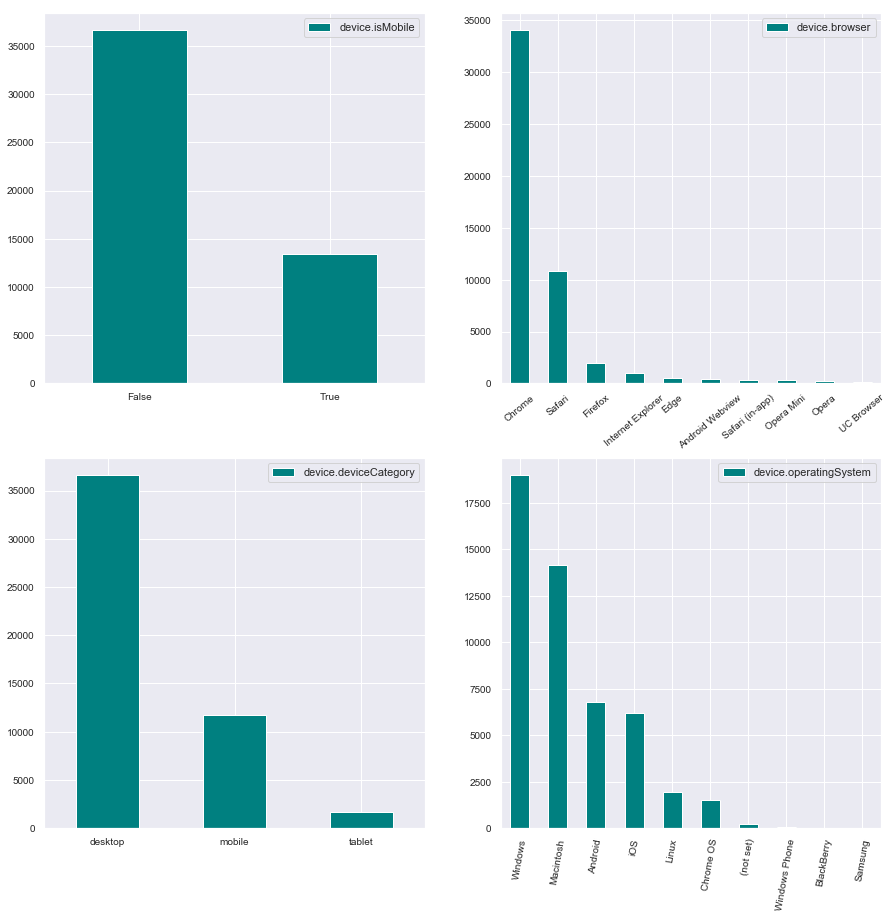

In [64]:
import matplotlib.pyplot as plt

#we show an hisogram of each column to see how data is scattered

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
df_trainDevice["device.isMobile"].value_counts().plot(kind="bar", ax=axes[0][0], rot=0, 
                                                    legend="isMobile", color='teal',fontsize=10.0)
df_trainDevice["device.browser"].value_counts().head(10).plot(kind="bar", ax=axes[0][1], rot=40, 
                                                    legend="browser",color='teal', fontsize=10.0)
df_trainDevice["device.deviceCategory"].value_counts().head(10).plot(kind="bar", ax=axes[1][0], rot=0,
                                                    legend="deviceCategory", color='teal', fontsize=10.0)
df_trainDevice["device.operatingSystem"].value_counts().head(10).plot(kind="bar", ax=axes[1][1], rot=80,
                                                    legend="operatingSystem", color='teal', fontsize=10.0)

plt.show()

In [65]:
'''
We make our data from String to Int for later use. Our desicion is to keep data that its frequency is higher thank 
1k. Some of the data taht we saw in previous graph it has little relevance to our future analysis. So for now, we 
refer to this data as '0' meaning 'not important'
'''
isMobile = {False : 0, True : 1}
browser = {'Chrome': 1, 'Safari': 2, 'Firefox': 3, 'Internet Explorer': 4, 'Edge': 5, 
           'Android Webview': 0,
           'Safari (in-app)': 0, 
           'Opera Mini': 0, 
           'Opera': 0, 
           'UC Browser': 0}
category = {'desktop': 1, 'mobile': 2, 'tablet': 3}
operatingSystem = {'Windows': 1, 'Macintosh': 2, 'Android': 3, 'iOS': 4, 'Linux': 5, 'Chrome OS': 6,
                   '(not set)': 0, 
                   'Windows Phone': 0, 
                   'BlackBerry': 0, 
                   'Samsung': 0}

#we map our data to its corresponding value
df_trainDevice["device.isMobile"] = df_trainDevice["device.isMobile"].map(isMobile)
df_trainDevice["device.browser"] = df_trainDevice["device.browser"].map(browser)
df_trainDevice["device.deviceCategory"] = df_trainDevice["device.deviceCategory"].map(category)
df_trainDevice["device.operatingSystem"] = df_trainDevice["device.operatingSystem"].map(operatingSystem)

In [66]:
#Print a few lines to make sure our map function worked correcly to the corresponding column

df_trainDevice.iloc[0:5, 12:16]

,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem
0,1.0,1,0,1.0
1,3.0,1,0,2.0
2,1.0,1,0,1.0
3,0.0,1,0,5.0
4,1.0,2,1,3.0


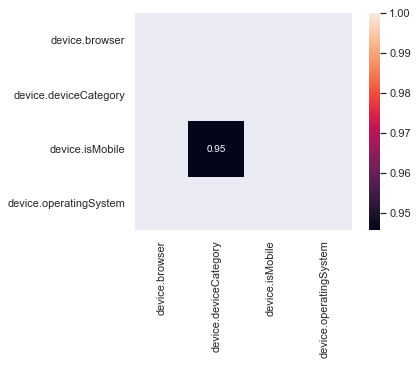

In [67]:
#Now that our variables are integers, we can see any possible correlations between them
import numpy as np
import seaborn as sns

columns = ['device.browser', 'device.deviceCategory', 'device.isMobile', 'device.operatingSystem']

cm = np.corrcoef(df_trainDevice[columns].values.T)
sns.set(font_scale=1)
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

hm = sns.heatmap(cm, cbar=True, annot=True,mask= mask, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=columns, xticklabels=columns )

plt.show()

In [68]:
# The attribute 'isMobile' it dows not add any value to our dataset through its True or False values. 
# so we proceed to remove this column and keep Device Category. 
df_trainDevice = df_trainDevice.drop(columns='device.isMobile')

In [75]:
df_trainDevice.iloc[0:10, 12:15]

,device.browser,device.deviceCategory,device.operatingSystem
0,1.0,1,1.0
1,3.0,1,2.0
2,1.0,1,1.0
3,0.0,1,5.0
4,1.0,2,3.0
5,1.0,1,1.0
6,1.0,1,1.0
7,1.0,1,1.0
8,4.0,1,1.0
9,3.0,1,1.0
